# 1. Load and Explore the IMDB dataset

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

# Load the IMDB dataset
num_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Print basic statistics
print(f"Number of training samples: {len(train_data)}")
print(f"Number of test samples: {len(test_data)}")
print(f"Length of first training sample: {len(train_data[0])}")
print(f"Length of second training sample: {len(train_data[1])}")

print('X_train:', train_data.shape)
print('y_train:', train_labels.shape)
print('X_test:', test_data.shape)
print('y_test:', test_labels.shape)


Number of training samples: 25000
Number of test samples: 25000
Length of first training sample: 218
Length of second training sample: 189
X_train: (25000,)
y_train: (25000,)
X_test: (25000,)
y_test: (25000,)


In [2]:
def vectorize_sequences(sequences, dimension=num_words):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Convert training data to bag-of-words:
train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)

# Convert labels from integers to floats:
train_labels = np.asarray(train_labels).astype('float32')
test_labels = np.asarray(test_labels).astype('float32')

print('X_train:', train_data.shape)
print('y_train:', train_labels.shape)
print('X_test:', test_data.shape)
print('y_test:', test_labels.shape)

X_train: (25000, 10000)
y_train: (25000,)
X_test: (25000, 10000)
y_test: (25000,)


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


# 2. Extract a sample Review from the dataset

In [4]:
def decode_review(text):
    # Get the word index from the dataset
    word_index = imdb.get_word_index()
    # Reverse the word index
    reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
    # Decode the review
    decoded_review = ' '.join([reversed_word_index.get(i - 3, '?') for i in text])
    return decoded_review

print("Sample 0:\n",decode_review(train_data[0]))
print("Expected sentiment: ", train_labels[0])

print("1 is positive, 0 is negative")

Sample 0:
 ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?

# 3. Creation of the networks

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.optimizers import Adam

def build_model(layers):
    model = Sequential()
    for i, layer_size in enumerate(layers):
        if i == 0:
            model.add(Dense(units=layer_size, activation='relu', input_shape=(num_words,)))
        else:
            model.add(Dense(units=layer_size, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
                optimizer='rmsprop', 
                metrics=['accuracy'])
    print(model.summary())
    return model

def train_and_plot(structure, model, train_data,train_labels):
    history = model.fit(train_data, train_labels, epochs=10)
    scores = model.evaluate(test_data, test_labels)
    print("\n\nACCURACY ON TEST SET: %.2f%%" % (model.metrics_names[1], scores[1]*100), "\n\n")

    plt.title(f'Model {str(structure)}: Training and Validation Loss')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.legend()
    plt.show()

## Create the different network sizes



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                160016    
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160033 (625.13 KB)
Trainable params: 160033 (625.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Epoch 1/10
782/782 [==============================] - 3s 3ms/step - loss: 0.3272 - accuracy: 0.8674
Epoch 2/10
782/782 [==============================] - 2s 3ms/step - loss: 0.2146 - accuracy: 0.9173
Epoch 3/10
782/782 [==============================] - 2s 3ms/step - loss: 0.1837 - accuracy: 0.9320
Epoch 4/10
782/782 [==============================] - 2s 3ms/step - loss: 0.1638 - accuracy: 0.9407
Epoch 5/10
782/782 [==============================] - 2s 3ms/step - loss: 0.1474 - accuracy: 0.9470
Epoch 6/10
782/782 [==============================] - 2s 3ms/step - loss: 0.1334 - accuracy: 0.9524
Epoch 7/10
782/782 [==============================] - 2s 3ms/step - loss: 0.1213 - accuracy: 0.9574
Epoch 8/10
782/782 [==============================] - 2s 3ms/step - loss: 0.1087 - accuracy: 0.9637
Epoch 9/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0976 - accuracy: 0.9683
Epoch 10/10
782/782 [==============================] - 1s 1ms/step - loss: 0.4732 - accuracy: 0

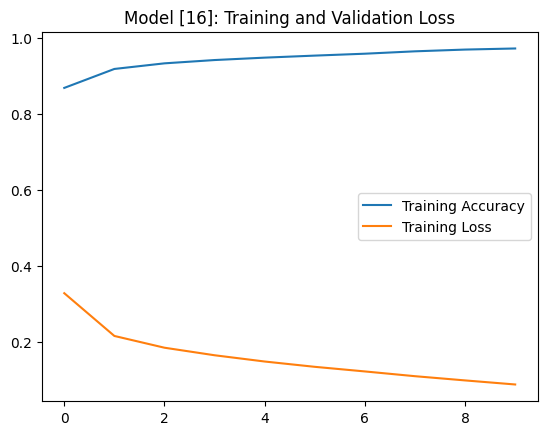

In [22]:
structure = [16]
model = build_model(structure)
train_and_plot(structure, model, train_data, train_labels)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               1280128   
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dense_24 (Dense)            (None, 128)              

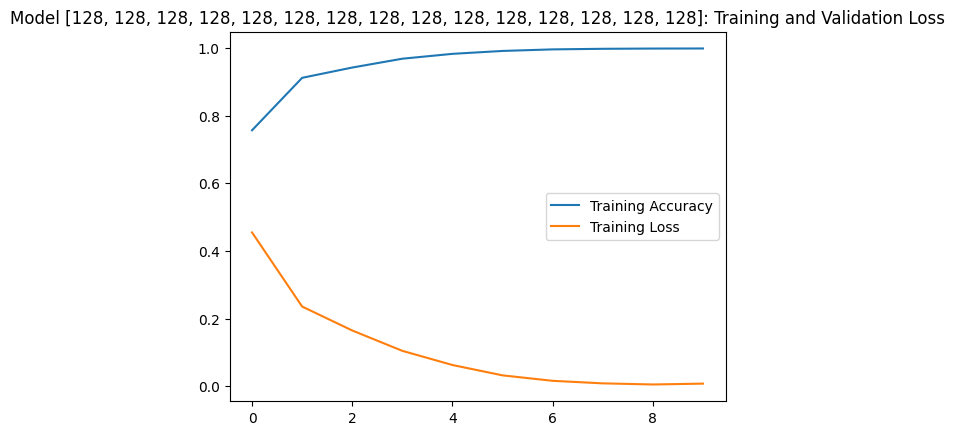

In [24]:
structure = [128,128,128,128,128,128,128,128,128,128,128,128,128,128,128]
model = build_model(structure)
train_and_plot(structure, model, train_data, train_labels)

# 4. Introduce Overfitting

Typically, a model will overfit if:

- It has too many parameters (i.e., a large model).
- It's trained for too many epochs.
- There isn't enough training data.
- 
Here's how you can train the larger model for more epochs to induce overfitting:

Here we can see the effect of overfitting. The yellow show the validation accuracy and the blue shows the training accuracy. The validation accuracy decreases while the training accuracy increases. This is a clear sign of overfitting.

For preventing overfitting, there are many techniques including:

- Regularization
- Dropout
- Early stopping
- Using more training data or augmenting existing data
- Using simpler model architectures.

Remember, it's important to always validate the model on unseen data to understand how it's likely to perform in a real-world scenario.